In [95]:
import networkx as nx
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import zarr
import matplotlib.animation as animation
from scipy.spatial.distance import cdist

In [170]:
Gp = nx.read_gml('Gp.gml')
Gv = nx.read_gml('Gv.gml')

data = zarr.load('data.zarr')

In [171]:
Gp = nx.convert_node_labels_to_integers(Gp)
Gv = nx.convert_node_labels_to_integers(Gv)

MovieWriter ffmpeg unavailable; using Pillow instead.


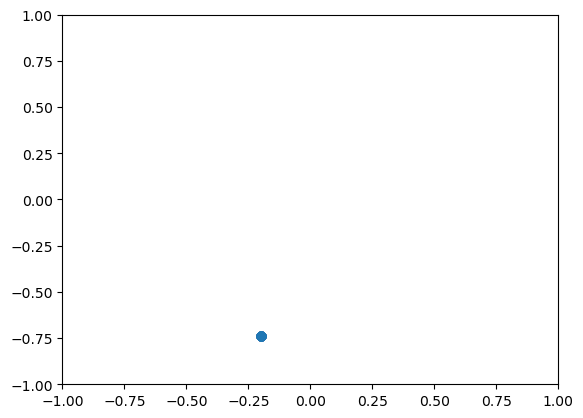

In [172]:
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
scat = ax.scatter([], [])

# Initialization function
def init():
    scat.set_offsets([0,0])
    return scat,

# Animation function
def animate(i):
    # Update the scatter plot with the data at the ith time step
    scat.set_offsets(data['d'][i, :, :])
    return scat,

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=100, interval=100, blit=True)

# To save the animation (uncomment the following line if needed)
ani.save('animation.gif')

# To display the animation
plt.show()

In [173]:
v_df = pd.DataFrame(data['v'])
s_df = pd.DataFrame(data['s'])

<Axes: >

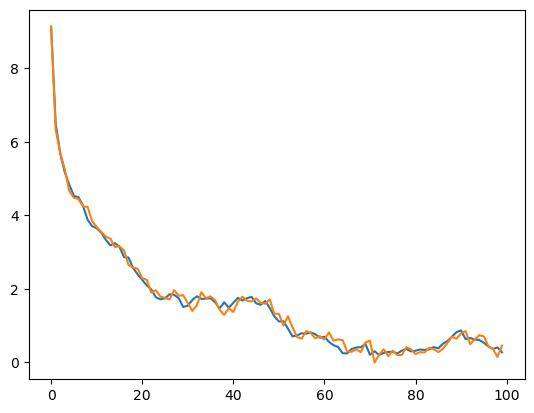

In [174]:
s_df.loc[:, :1000].apply(lambda x: -(x.value_counts(normalize=True) * np.log2(x.value_counts(normalize=True))).sum(), axis=1).plot()
s_df.loc[:, 1000:].apply(lambda x: -(x.value_counts(normalize=True) * np.log2(x.value_counts(normalize=True))).sum(), axis=1).plot()

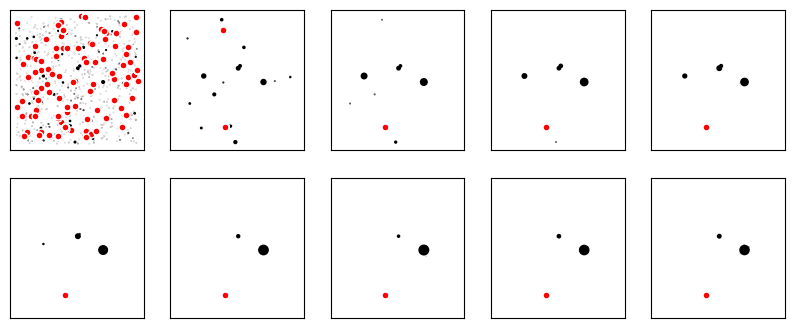

In [197]:
# Plot Gp shaded by prevalence in 10 time eras.
fig, axes = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    sample = s_df.iloc[i*10:(i+1)*10, :1000]
    shades = sample.stack().value_counts(normalize=True).reindex(range(1000)).fillna(0)
    nodes = list(Gp.nodes(data=True))
    pos = [n[1]['pos'] for n in nodes]

    d_sample = data['d'][i*10:(i+1)*10]

    n = nx.draw_networkx_nodes(Gp, pos=pos, ax=ax, node_size=50*shades.values, node_color='k')
    ax.plot(d_sample[:,:,0].flatten(), d_sample[:,:,1].flatten(), '.r', ms=10, mec='w')

In [176]:
v_df = pd.DataFrame(data['v']).applymap(lambda x: Gv.nodes(data=True)[x]['v'])

/var/folders/mp/32m29kq1643bw2wj_l7slh380000gn/T/ipykernel_11869/913075294.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  v_df = pd.DataFrame(data['v']).applymap(lambda x: Gv.nodes(data=True)[x]['v'])


<Axes: >

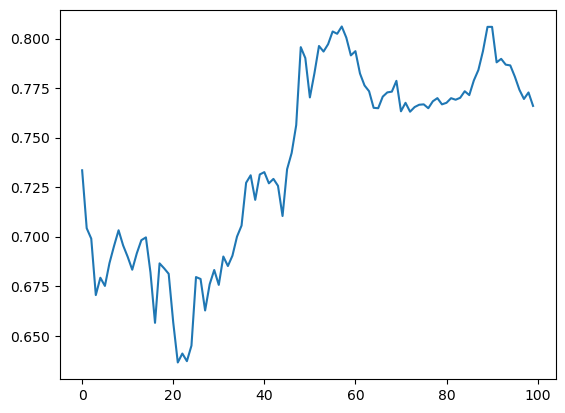

In [177]:
v_df.mean(1).plot()

<Axes: >

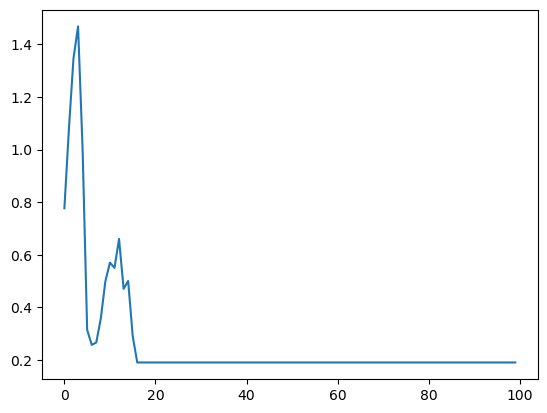

In [184]:
r_df = pd.DataFrame(data['r'])
r_df.mean(1).plot()